In [40]:

import pandas as pd
#lets load our queries
queries = pd.read_table( './uniprot-goa_(_TOR+signaling+[31929]_)-filtered-organism__Homo+--.tab')
print(queries)
additionalqueries = ['FKBP15' , 'Q9ULK8' ]

         Entry        Entry name      Status  \
0       Q6R327       RICTR_HUMAN    reviewed   
1       Q8TAI7       REBL1_HUMAN    reviewed   
2       Q13541       4EBP1_HUMAN    reviewed   
3       Q13542       4EBP2_HUMAN    reviewed   
4       Q9NRI5       DISC1_HUMAN    reviewed   
5       Q9BXL7       CAR11_HUMAN    reviewed   
6       P31749        AKT1_HUMAN    reviewed   
7       Q8TF40       FNIP1_HUMAN    reviewed   
8       Q2KHT3       CL16A_HUMAN    reviewed   
9       Q8NFG4        FLCN_HUMAN    reviewed   
10      Q6PKG0       LARP1_HUMAN    reviewed   
11      Q3V6T2        GRDN_HUMAN    reviewed   
12      Q12980       NPRL3_HUMAN    reviewed   
13      Q9BXM7       PINK1_HUMAN    reviewed   
14      Q6MZQ0       PRR5L_HUMAN    reviewed   
15      O75663       TIPRL_HUMAN    reviewed   
16      P62753         RS6_HUMAN    reviewed   
17      Q8N122       RPTOR_HUMAN    reviewed   
18      Q96A49       SYAP1_HUMAN    reviewed   
19      Q9BPZ7        SIN1_HUMAN    revi

/home/cactuskid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """


In [41]:
from omadb import Client
c = Client()
omadata = {}
#retrieve oma entries

for q in list(queries['Entry']) + additionalqueries:    
    try:
        omadata[q] = c.entries.__getitem__(q) 
    except:
        print('err ' +q)


err I3L2I3
err B4DJ80
err B7Z3S8
err I3L2E7
err Q6DKI0
err D6R9S6
err Q8N6M7
err B4E2R3
err FKBP15
err Q9ULK8


In [31]:

orthologs = {}
#get all orthologoues of entries
entry2hogs={}
for q in omadata:
    try:
        orthologs[q] = c.entries.orthologs(omadata[q]['omaid']) 
    except:
        print('err ' + q)        


In [32]:
#create input profiles w just orthology data
#use just species codes
profiles = {}
for q in orthologs:
    profiles[q] = {}
    profiles[q]['name'] = omadata[q]['canonicalid']
    for o in orthologs[q]:
        s = o['omaid'][0:4]
        if s not in profiles[q]:
            profiles[q][s] = 1
        else:
            profiles[q][s]+=1
columns = set([ s  for q in profiles for s in profiles[q] ])
for q in profiles:
    profiles[q].update( { s : 0 for s in columns if s not in profiles[q] } )
orthosdf = pd.DataFrame.from_dict( profiles , orient = 'index')
orthosdf.index = orthosdf.index + ' : '+orthosdf.name
orthosdf = orthosdf.drop('name', axis = 1)
print(orthosdf)

                          BRAF  LEPO  GASA  TAKR  TETN  ORYL  NOTF  POEF  \
A0A024QZM3 : 4EBP2_HUMAN     0     1     1     1     0     0     3     1   
A0A075B6Q7 : A0A075B6Q7      0     1     1     0     1     1     1     1   
A0A0A0MR05 : A0A0A0MR05      0     0     0     0     0     0     0     0   
H3BM50 : A0A0H3BM50          0     0     0     0     0     0     0     0   
H3BN58 : A0A0H3BN58          0     0     0     0     0     0     0     0   
H3BPT1 : A0A0H3BPT1          0     0     0     0     0     0     0     0   
H3BPU5 : A0A0H3BPU5          0     0     0     0     0     0     0     0   
H3BQ74 : A0A0H3BQ74          0     0     0     0     0     0     0     0   
H3BR25 : A0A0H3BR25          0     0     0     0     0     0     0     0   
H3BR38 : A0A0H3BR38          0     0     0     0     0     0     0     0   
H3BSZ4 : A0A0H3BSZ4          0     0     0     0     0     0     0     0   
O75663 : TIPRL_HUMAN         1     1     1     1     1     2     1     1   
P23443 : KS6

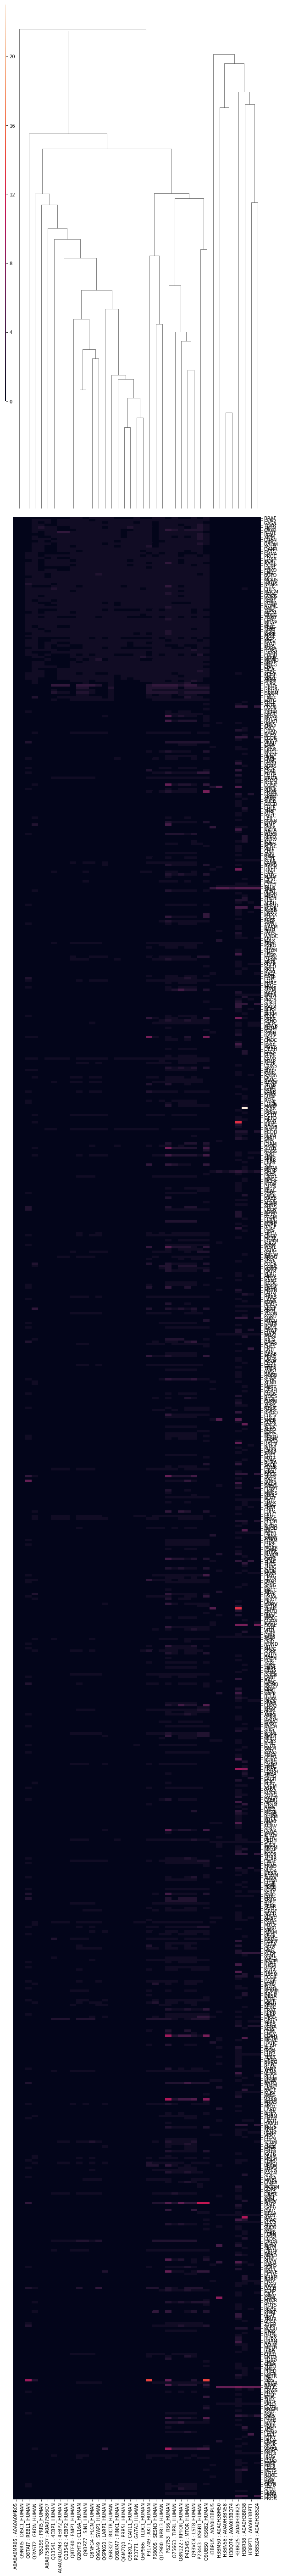

In [33]:
import seaborn as sns

#lets visualize the clustered profile matrix
metrics = [ 'euclidean', 'hamming', 'jaccard' ]
methods = [ 'average' , 'weighted' , 'centroid']
sns.clustermap( orthosdf.T , metric= metrics[2] , method=methods[1] , col_cluster=True, row_cluster= False, yticklabels = orthosdf.columns , figsize = (10, 100))


[[0.         0.61038961 1.         ... 0.50574713 1.         0.81322957]
 [0.61038961 0.         1.         ... 0.37313433 1.         0.85542169]
 [1.         1.         0.         ... 1.         0.         1.        ]
 ...
 [0.50574713 0.37313433 1.         ... 0.         1.         0.78740157]
 [1.         1.         0.         ... 1.         0.         1.        ]
 [0.81322957 0.85542169 1.         ... 0.78740157 1.         0.        ]]


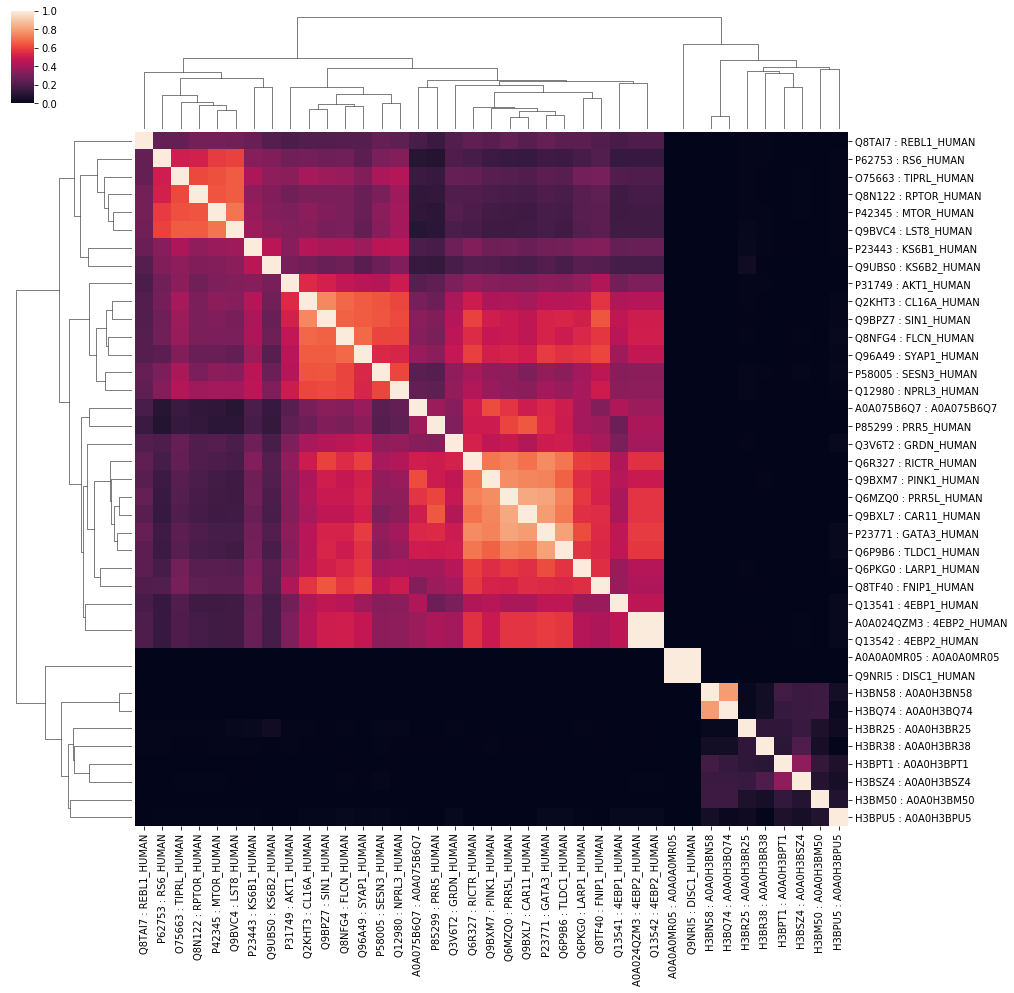

In [34]:
from scipy.spatial.distance import cdist

#and the clustered profile distance kernel
distmat = cdist(orthosdf.to_numpy(), orthosdf.to_numpy() , metric = metrics[2])
sns.clustermap( 1-distmat , metric= metrics[0] , method=methods[1] , col_cluster=True, row_cluster= True, yticklabels = orthosdf.index , xticklabels = orthosdf.index , figsize = (15, 15))



In [35]:
#now with pyham over the all taxonomic levels with evolutionary events
#extra spicy


#load HAM data
import pyham 
database_to_query = 'oma'
Hams = {}
for q in omadata:    
    try:
        Hams[q] = pyham.Ham(query_database=omadata[q]['omaid'], use_data_from=database_to_query) 
    except:
        print('err ' + q)

err Q8TAI7
err Q9NRI5
err P31749
err Q12980
err O75663
err P62753
err Q8N122
err P58005
err Q9BVC4
err P23443
err Q9UBS0
err P42345
err H3BR25
err H3BPT1
err H3BN58
err H3BSZ4
err H3BQ74
err H3BM50
err H3BR38
err A0A0A0MR05
{'Q6R327': <pyham.ham.Ham object at 0x7f0d337b46a0>, 'Q13541': <pyham.ham.Ham object at 0x7f0d295b0c88>, 'Q13542': <pyham.ham.Ham object at 0x7f0d324bbb38>, 'Q9BXL7': <pyham.ham.Ham object at 0x7f0d64402dd8>, 'Q8TF40': <pyham.ham.Ham object at 0x7f0d642086d8>, 'Q2KHT3': <pyham.ham.Ham object at 0x7f0d286319e8>, 'Q8NFG4': <pyham.ham.Ham object at 0x7f0d291925c0>, 'Q6PKG0': <pyham.ham.Ham object at 0x7f0d28386898>, 'Q3V6T2': <pyham.ham.Ham object at 0x7f0d2913ea90>, 'Q9BXM7': <pyham.ham.Ham object at 0x7f0d2963deb8>, 'Q6MZQ0': <pyham.ham.Ham object at 0x7f0d293cd0b8>, 'Q96A49': <pyham.ham.Ham object at 0x7f0d284467b8>, 'Q9BPZ7': <pyham.ham.Ham object at 0x7f0d28473a58>, 'Q6P9B6': <pyham.ham.Ham object at 0x7f0d28b8b1d0>, 'P85299': <pyham.ham.Ham object at 0x7f0d2857a5

In [54]:
#lets look at all the taxonomic levels of our input matrix
taxaIndex = set([ taxon.name for H in Hams for taxon in Hams[H].taxonomy.tree.traverse() ]) 
species = set( [ taxon.name for H in Hams for taxon in Hams[H].taxonomy.tree.get_leaves()])
print(len(taxaIndex))

4426


In [56]:
profiles = {}
import numpy as np

for q in Hams:
    hogs = Hams[q].get_list_top_level_hogs()
    for hog in hogs:    
        profiles[hog.hog_id] = {}
        tp = Hams[q].create_tree_profile(hog = hog).treemap

        losses = { n.name+'_loss': n.lost  for n in tp.traverse() if n.lost  }
        losses.update( { t+'_loss': 0 for t in taxaIndex if t+'_loss' not in losses} )
        
        profiles[hog.hog_id].update(losses)
        
        dupl = { n.name+'_dupl': n.dupl for n in tp.traverse() if n.dupl   }
        dupl.update( {t+'_dupl': 0 for t in taxaIndex if t+'_dupl' not in dupl} )
        
        profiles[hog.hog_id].update(dupl)
        
        copies = { n.name+'_copies': n.nbr_genes for n in tp.traverse() if n.nbr_genes > 0  }
        nocopies = {t+'_copies': 0 for t in taxaIndex if t+'_copies' not in copies}
        copies.update( nocopies )
        
        profiles[hog.hog_id].update(copies)
        profiles[hog.hog_id]['name']=  omadata[q]['canonicalid']
        


profile_df = pd.DataFrame.from_dict( profiles , orient = 'index')
profile_df.index = profile_df.index +' : ' + profile_df.name
profile_df = profile_df.drop('name' , axis = 1)
print(profile_df)

                           Platyhelminthes_loss  Ecdysozoa_loss  \
HOG:0370783 : A0A075B6Q7                      0               0   
HOG:0379589 : TLDC1_HUMAN                     0               0   
HOG:0379970 : PRR5L_HUMAN                     0               0   
HOG:0380866 : PRR5_HUMAN                      0               0   
HOG:0381570 : PINK1_HUMAN                     0               0   
HOG:0382618 : CAR11_HUMAN                     0               0   
HOG:0384781 : GATA3_HUMAN                     0               0   
HOG:0390240 : RICTR_HUMAN                     1               1   
HOG:0390743 : GRDN_HUMAN                      1               1   
HOG:0395737 : 4EBP2_HUMAN                     0               0   
HOG:0399914 : LARP1_HUMAN                     2               0   
HOG:0402062 : FNIP1_HUMAN                     1               0   
HOG:0408579 : SIN1_HUMAN                      0               0   
HOG:0409753 : SYAP1_HUMAN                     2               

In [57]:
selected_taxa = species
#get the species
events = [ '_copies'  , '_dupl' , '_loss']
cols = [ t+e for e in events for t in taxaIndex ]

#slice the df to get matrices
sub_df = profile_df.loc[:,cols]
sub_df = sub_df.loc[:, (sub_df != 0).any(axis=0)]
print(sub_df)


                           Latimeria chalumnae_copies  Chiroptera_copies  \
HOG:0370783 : A0A075B6Q7                            0                  1   
HOG:0379589 : TLDC1_HUMAN                           0                  1   
HOG:0379970 : PRR5L_HUMAN                           1                  1   
HOG:0380866 : PRR5_HUMAN                            1                  0   
HOG:0381570 : PINK1_HUMAN                           1                  1   
HOG:0382618 : CAR11_HUMAN                           1                  1   
HOG:0384781 : GATA3_HUMAN                           2                  2   
HOG:0390240 : RICTR_HUMAN                           1                  1   
HOG:0390743 : GRDN_HUMAN                            2                  2   
HOG:0395737 : 4EBP2_HUMAN                           2                  2   
HOG:0399914 : LARP1_HUMAN                           2                  2   
HOG:0402062 : FNIP1_HUMAN                           2                  2   
HOG:0408579 

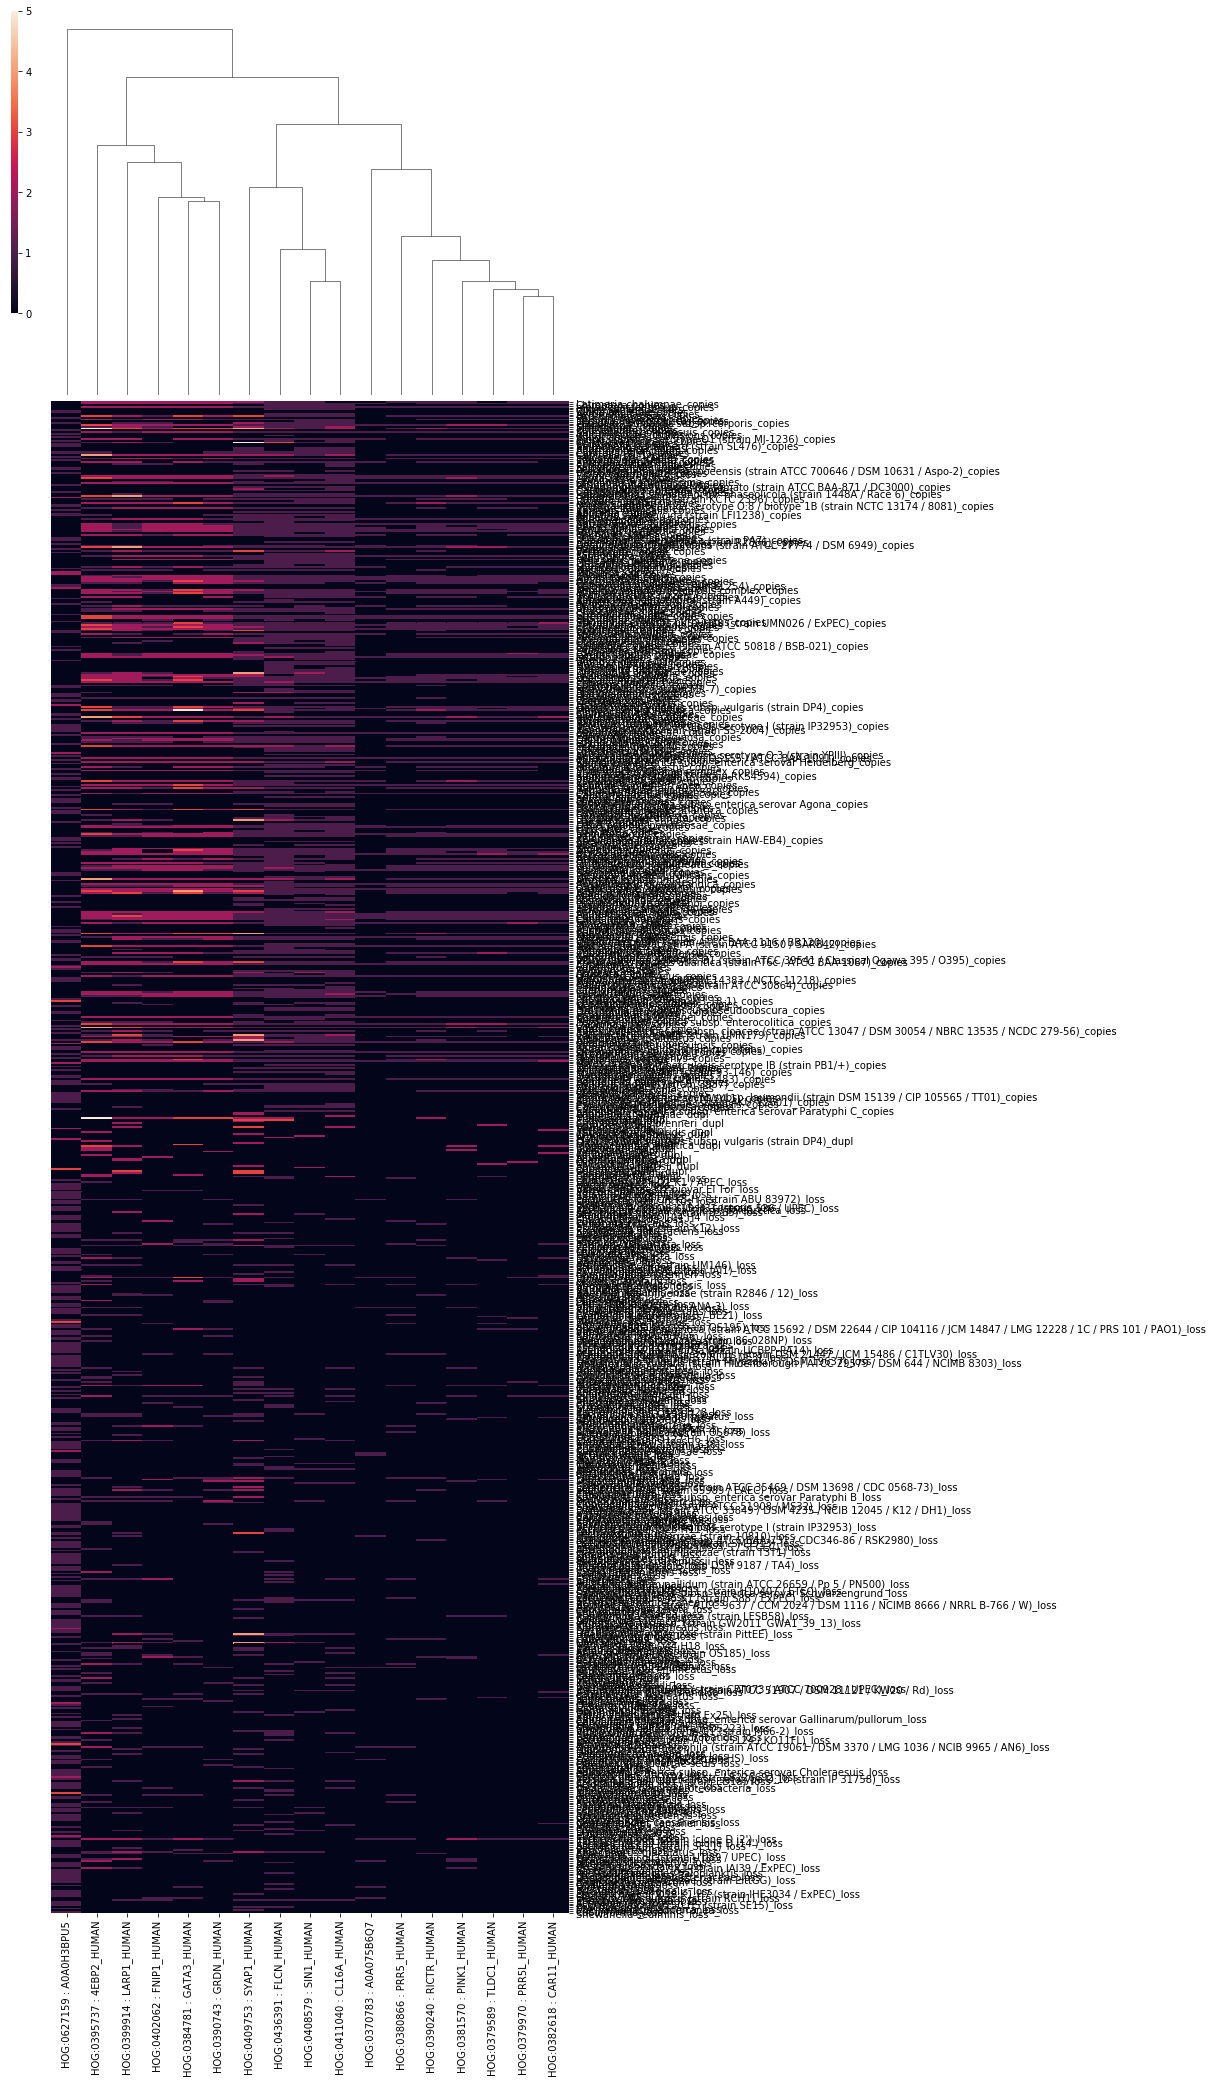

In [58]:

sns.clustermap( sub_df.T , metric= metrics[2] , method=methods[1] , col_cluster=True, row_cluster= False, yticklabels = sub_df.columns , figsize = (10, 35))


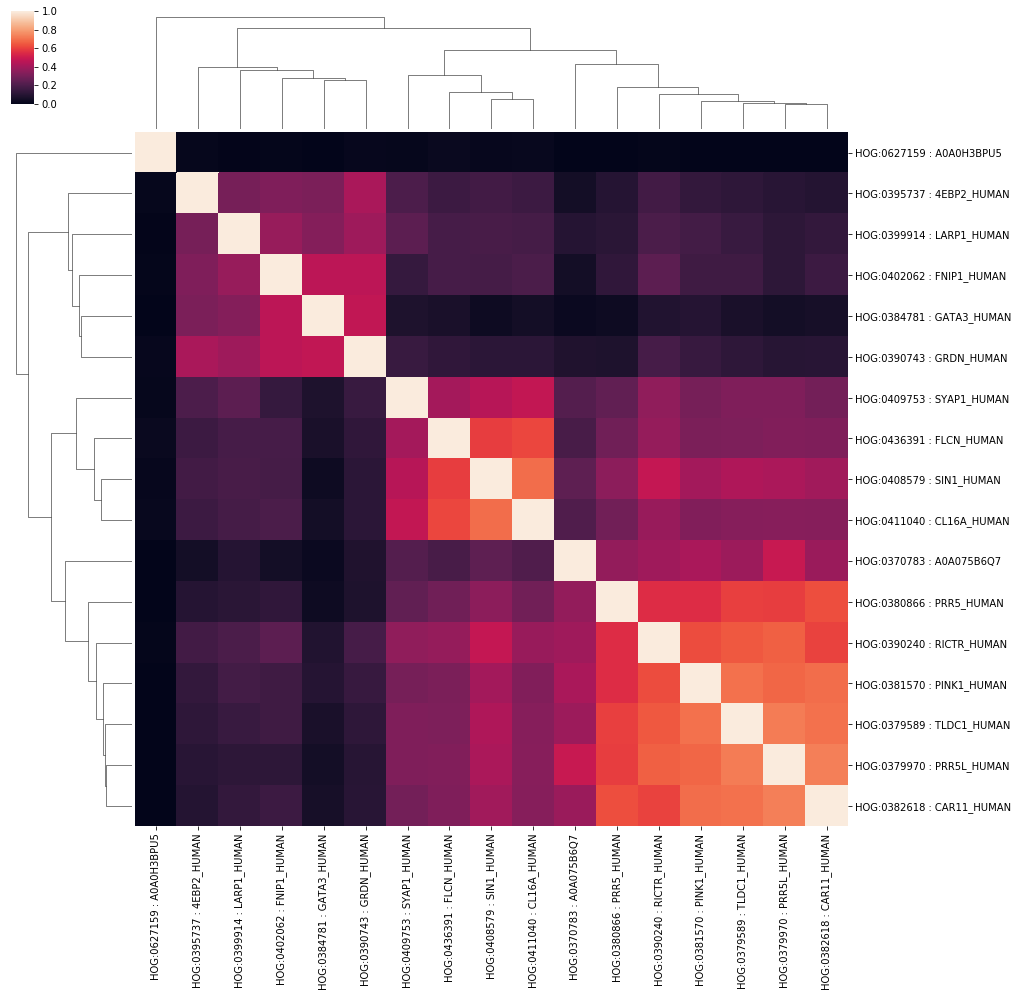

In [59]:


distmat = cdist(sub_df.to_numpy(), sub_df.to_numpy() , metric = metrics[2])
sns.clustermap( 1-distmat , metric= metrics[0] , method=methods[1] , col_cluster=True, row_cluster= True, yticklabels = sub_df.index , xticklabels = sub_df.index , figsize = (15, 15))

